Downloading Kaggle dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download surajghuwalewala/ham1000-segmentation-and-classification

100% 2.59G/2.59G [01:25<00:00, 34.4MB/s]
100% 2.59G/2.59G [01:25<00:00, 32.5MB/s]


In [ ]:
! unzip /content/ham1000-segmentation-and-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: masks/ISIC_0029321_segmentation.png  
  inflating: masks/ISIC_0029322_segmentation.png  
  inflating: masks/ISIC_0029323_segmentation.png  
  inflating: masks/ISIC_0029324_segmentation.png  
  inflating: masks/ISIC_0029325_segmentation.png  
  inflating: masks/ISIC_0029326_segmentation.png  
  inflating: masks/ISIC_0029327_segmentation.png  
  inflating: masks/ISIC_0029328_segmentation.png  
  inflating: masks/ISIC_0029329_segmentation.png  
  inflating: masks/ISIC_0029330_segmentation.png  
  inflating: masks/ISIC_0029331_segmentation.png  
  inflating: masks/ISIC_0029332_segmentation.png  
  inflating: masks/ISIC_0029333_segmentation.png  
  inflating: masks/ISIC_0029334_segmentation.png  
  inflating: masks/ISIC_0029335_segmentation.png  
  inflating: masks/ISIC_0029336_segmentation.png  
  inflating: masks/ISIC_0029337_segmentation.png  
  inflating: masks/ISIC_0029338_segmentation.png  
  inflating: masks/ISIC_0029339

Import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML


Reading csv file 

In [ ]:
df=pd.read_csv('/content/GroundTruth.csv')
print (df.head())
print (len(df))
print (df.columns)
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10015
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [ ]:
df['image']=df['image'].apply(lambda x: x+ '.jpg')
print (df.head())

              image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309.jpg  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310.jpg  1.0  0.0  0.0    0.0  0.0  0.0   0.0


Creating a dataframe that has image name and class of it

In [ ]:
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
label_list=[]
for i in range (len(df)):
    row= list(df.iloc[i])
    del row[0]
    index=np.argmax(row)
    label=labels[index]
    label_list.append(label)
df['label']= label_list
df=df.drop(labels, axis=1)
print (df.head())

              image label
0  ISIC_0024306.jpg    NV
1  ISIC_0024307.jpg    NV
2  ISIC_0024308.jpg    NV
3  ISIC_0024309.jpg    NV
4  ISIC_0024310.jpg   MEL


In [ ]:
print(df.shape)

(10015, 2)


Unzip of ISIC google drive data

In [ ]:
!unzip "/content/drive/MyDrive/RESEARCH CANCER/archive.zip"

Archive:  /content/drive/MyDrive/RESEARCH CANCER/archive.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  i

Code to merge the Dataset of ISIC google drive data and Kaggle dataset

In [ ]:
import os
import shutil
counter=0
mp={
    

'MEL':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma", 
'NV':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus",
 'BCC':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma", 
 'AKIEC':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis", 
 'BKL':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis", 
 'DF':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma", 
 'VASC':"/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion"
}
dir='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
directory='/content/images'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    x=df.loc[df['image'] == filename]
    a=x['label']
    class_name=''
    for i in a:
      class_name=i
    
    if len(class_name)>0:
      temp_path=os.path.join(mp[class_name],filename)
    
    
      isdir=os.path.isfile(temp_path)
      print(isdir)
      if not isdir:
        shutil.move(f,mp[class_name])
        counter+=1
    
    
      
    
    


Streaming output truncated to the last 5000 lines.
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
True
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False


In [ ]:
print(counter)

8829


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import splitfolders # or import splitfolders
input_folder = "/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
output = "/content" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=1337, ratio=(.7, .2, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 11068 files [00:23, 471.71 files/s]


In [ ]:
p="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
for class_name in os.listdir(p):
  path1=os.path.join(p,class_name)
  dest=os.path.join("/content/test",class_name)

  for file_name in os.listdir(path1):
    t=os.path.join(path1,file_name)
    isdir=os.path.isfile(t)
      
    if not isdir:
      shutil.move(os.path.join(path1,file_name),dest)

  

NUmber of Images in train dataset

In [ ]:

import os
import math 

files={}
dir='/content/train'
a=0
mul={}
arr1=[]
su=0
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  su+=number_files
  print(_+' '+str(number_files))
  
print(su)


  

vascular lesion 99
squamous cell carcinoma 126
melanoma 1085
pigmented benign keratosis 769
dermatofibroma 80
nevus 4943
basal cell carcinoma 359
seborrheic keratosis 53
actinic keratosis 228
7742


NUmber of images in VALID dataset

In [ ]:
su1=0
import os
import math 

files={}
dir='/content/val'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  su1+=number_files
  print(_+' '+str(number_files))
  

print(su1)

  

vascular lesion 28
squamous cell carcinoma 36
melanoma 310
pigmented benign keratosis 219
dermatofibroma 23
nevus 1412
basal cell carcinoma 102
seborrheic keratosis 15
actinic keratosis 65
2210


NUmber of images in TEST dataset

In [ ]:

import os
import math 
su2=0
files={}
dir='/content/test'
a=0
mul={}
arr1=[]
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  su2+=number_files
  print(_+' '+str(number_files))
  arr1.append(_)
  
print(su2)


  

vascular lesion 15
squamous cell carcinoma 19
melanoma 156
pigmented benign keratosis 111
dermatofibroma 12
nevus 707
basal cell carcinoma 53
seborrheic keratosis 9
actinic keratosis 34
1116


In [ ]:
print(su1+su2+su)

11068


Original: 10015

In [ ]:
# note that we are not augmenting class 'nv'
class_list = arr1

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = '/content/aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir(os.path.join('/content/train',img_class))
    print(img_list)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('/content/train/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = '/content/train/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(50,50),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

['_58_3844602.jpg', '_71_8852546.jpg', 'ISIC_0031270.jpg', '_61_6668236.jpg', '_42_6094254.jpg', '_91_8624332.jpg', '_20_2262430.jpg', '_14_823736.jpg', '_13_1759988.jpg', '_49_843448.jpg', '_43_178904.jpg', '_68_7610590.jpg', '_21_1123453.jpg', '_79_1262936.jpg', '_24_1585690.jpg', '_64_6240131.jpg', '_71_4018142.jpg', '_13_4843645.jpg', '_34_1385211.jpg', '_86_8397449.jpg', '_64_9164116.jpg', '_71_8727409.jpg', '_19_1538273.jpg', '_96_6777556.jpg', '_54_4265369.jpg', '_60_6388317.jpg', '_40_3729022.jpg', '_73_9649612.jpg', '_9_2969491.jpg', '_33_9342317.jpg', '_85_3331099.jpg', '_49_5856214.jpg', '_78_5117985.jpg', '_16_9191518.jpg', '_78_708589.jpg', '_9_7679034.jpg', '_97_1466393.jpg', '_87_876555.jpg', '_15_6628759.jpg', '_78_1687116.jpg', '_12_8379644.jpg', '_91_2365287.jpg', '_67_5602571.jpg', '_49_8664534.jpg', '_31_1400749.jpg', '_44_2705005.jpg', '_0_970917.jpg', '_97_1432336.jpg', '_12_9435218.jpg', '_66_272828.jpg', '_42_9772893.jpg', '_79_1250631.jpg', '_69_8273582.jpg', '

In [ ]:

import os
import math 

files={}
dir='/content/train'
a=0
mul={}
arr1=[]
su=0
path = dir # dir is your directory path
for _ in os.listdir(path):
  
  
  x=os.path.join(path,_)
  z = os.listdir(x) # dir is your directory path
  number_files = len(z)
  #number_files = len(list)
  su+=number_files
  print(_+' '+str(number_files))
  
print(su)


  

vascular lesion 6040
squamous cell carcinoma 5090
melanoma 5975
pigmented benign keratosis 5833
dermatofibroma 4850
nevus 6043
basal cell carcinoma 5435
seborrheic keratosis 3230
actinic keratosis 5522
48018


In [ ]:
from __future__ import absolute_import, division, print_function
from tqdm import tqdm
from numpy.random import randn


import cv2
import pathlib
import random

In [ ]:
data_root='/content/train'
data_dir = pathlib.Path(data_root)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['vascular lesion', 'squamous cell carcinoma', 'melanoma',
       'pigmented benign keratosis', 'dermatofibroma', 'nevus',
       'basal cell carcinoma', 'seborrheic keratosis',
       'actinic keratosis'], dtype='<U26')

In [ ]:
all_images = list(data_dir.glob('*/*'))
all_images = [str(path) for path in all_images]
random.shuffle(all_images)

data_size=len(all_images)

In [ ]:
channels = 3
IMG_SIZE=50

dataset = np.ndarray(shape=(len(all_images), IMG_SIZE, IMG_SIZE,channels),
                     dtype=np.float32)

i = 0
for _file in all_images:
  image = cv2.imread(_file, 1)
  image=cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    
  dataset[i] = image
  i += 1
print("All images to array!")

KeyboardInterrupt: ignored

In [ ]:
dataset=dataset/255.
dataset.min(),dataset.max(),dataset.shape

In [ ]:
mean = dataset.mean(axis=(0,1,2))
std = dataset.std(axis=(0,1,2))
print(mean, std)

In [ ]:
dataset[..., 0] -= mean[0]
dataset[..., 1] -= mean[1]
dataset[..., 2] -= mean[2]

In [ ]:
dataset.min(axis=(0,1,2)),dataset.max(axis=(0,1,2))

In [ ]:
dataset[..., 0] /= std[0]
dataset[..., 1] /= std[1]
dataset[..., 2] /= std[2]

In [ ]:
dataset.min(axis=(0,1,2)),dataset.max(axis=(0,1,2))

In [ ]:
!zip -r "/content/drive/MyDrive/train_data_aug.zip" "/content/train"

Streaming output truncated to the last 5000 lines.
  adding: content/train/actinic keratosis/_142_1380927.jpg (deflated 12%)
  adding: content/train/actinic keratosis/_147_4495209.jpg (deflated 15%)
  adding: content/train/actinic keratosis/_209_2792908.jpg (deflated 12%)
  adding: content/train/actinic keratosis/_61_7130757.jpg (deflated 10%)
  adding: content/train/actinic keratosis/_197_7618253.jpg (deflated 13%)
  adding: content/train/actinic keratosis/_116_6334173.jpg (deflated 12%)
  adding: content/train/actinic keratosis/_34_4128998.jpg (deflated 12%)
  adding: content/train/actinic keratosis/_192_3212964.jpg (deflated 11%)
  adding: content/train/actinic keratosis/_47_7917340.jpg (deflated 12%)
  adding: content/train/actinic keratosis/ISIC_0031609.jpg (deflated 0%)
  adding: content/train/actinic keratosis/_115_578467.jpg (deflated 11%)
  adding: content/train/actinic keratosis/_158_2565083.jpg (deflated 14%)
  adding: content/train/actinic keratosis/_107_7014072.jpg (deflat

File zipped and uploaded to drive

In [ ]:
!zip -r "/content/drive/MyDrive/RESEARCH CANCER/data_merged.zip" "/content/MERGED_DATA"

Streaming output truncated to the last 5000 lines.
  adding: content/MERGED_DATA/train/nevus/ISIC_0029214.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0032627.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0031279.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0026020.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0032361.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0026320.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0026367.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0028948.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0000387.jpg (deflated 1%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0028768.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0029785.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0025172.jpg (deflated 0%)
  adding: content/MERGED_DATA/train/nevus/ISIC_0031466.jpg (deflated 0%)


In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
DATADIRTRAIN="/content/train"
DATADIRVALID='/content/test'
#Dataset path

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True)
# calculate mean on training dataset


In [ ]:
train= datagen.flow_from_directory(
       DATADIRTRAIN ,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


#batch_size: No. of images to be yielded from the generator per batch.

Found 7742 images belonging to 9 classes.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


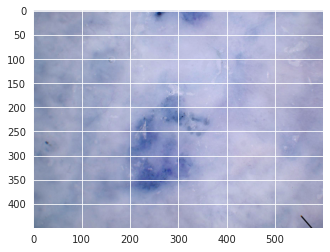

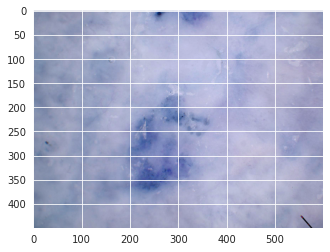

In [ ]:
import cv2
for x,y in train:
  img=cv2.imread('/content/train/actinic keratosis/ISIC_0024329.jpg')
  plt.imshow(img)
  plt.show()
  img=img-3
  plt.imshow(img)
  break

Mean: 176.786
Min: 0.000, Max: 251.000
(450, 600, 3)
Mean: 0.000
Min: -176.786, Max: 74.214


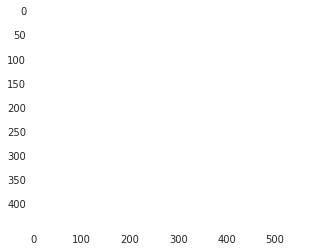

In [ ]:

# example of global centering (subtract mean)
from numpy import asarray
from PIL import Image
# load image
image = Image.open('/content/train/actinic keratosis/ISIC_0024329.jpg')
pixels = asarray(image)

# convert from integers to floats
pixels = pixels.astype('float32')
plt.imshow(pixels)
# calculate global mean
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
print(pixels.shape)
# global centering of pixels
pixels = pixels - mean
# confirm it had the desired effect
mean = pixels.mean()
print('Mean: %.3f' % mean)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Global Centering

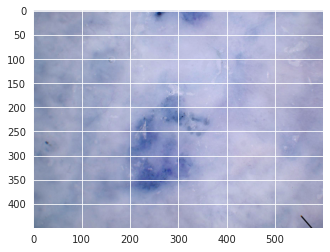

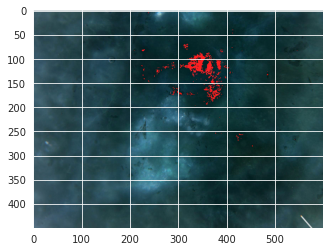

In [ ]:
img=cv2.imread('/content/train/actinic keratosis/ISIC_0024329.jpg')
plt.imshow(img)
plt.show()
data=pixels*255
data=data.astype(np.uint8)
data=Image.fromarray(data)
plt.imshow(data)

Image Global Standardization

In [ ]:
from numpy import asarray
from PIL import Image
# load image
image = Image.open('/content/train/actinic keratosis/ISIC_0024329.jpg')
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 176.786, Standard Deviation: 26.645
Mean: 0.000, Standard Deviation: 1.000


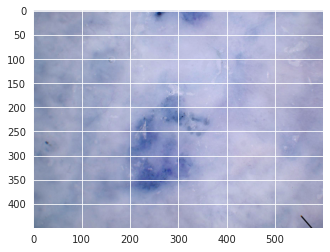

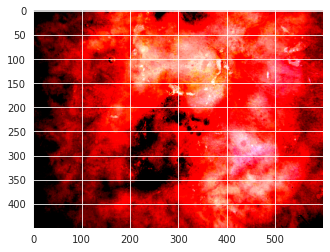

In [ ]:
img=cv2.imread('/content/train/actinic keratosis/ISIC_0024329.jpg')
plt.imshow(img)
plt.show()
plt.imshow(pixels)

Image Normalisation

In [ ]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('/content/train/actinic keratosis/ISIC_0024329.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 251.000
Min: 0.000, Max: 0.984


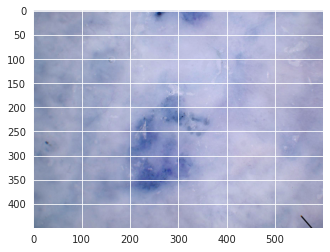

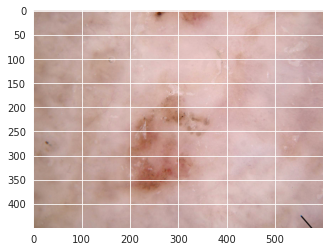

In [ ]:
img=cv2.imread('/content/train/actinic keratosis/ISIC_0024329.jpg')
plt.imshow(img)
plt.show()
plt.imshow(pixels)